In [2]:
# Import the standard modules to be used in this lab
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_pd = pd.DataFrame(cancer.data)
cancer_pd.columns = cancer.feature_names
cancer_pd['target'] = cancer.target

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
normData = scaler.fit_transform(cancer_pd.astype(float))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normData[:,0:30],
normData[:,30])

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=7)
classifiers = []
classifiers.append(('clf1', dt))
classifiers.append(('clf2', gnb))
classifiers.append(('clf3', knn))
ensemble = VotingClassifier(classifiers, voting='hard')
ensemble.fit(X_train, y_train)
y_pred_vot = ensemble.predict(X_test)


In [7]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_vot))
print(classification_report(y_test, y_pred_vot))

[[63  1]
 [ 1 78]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        64
         1.0       0.99      0.99      0.99        79

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [9]:
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

[[62  2]
 [ 5 74]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        64
         1.0       0.97      0.94      0.95        79

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [10]:
from sklearn.ensemble import BaggingClassifier
num_classifiers = 500
max_samples = len(X_train)
base_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
bag_clf = BaggingClassifier(base_estimator=base_clf,
n_estimators=num_classifiers,
max_samples=max_samples,
bootstrap=True,
random_state=1)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

In [11]:
print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

[[63  1]
 [ 2 77]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        64
         1.0       0.99      0.97      0.98        79

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [12]:
from sklearn.ensemble import AdaBoostClassifier
num_classifiers = 500
learning_rate = 0.07
ada_clf = AdaBoostClassifier(base_estimator=base_clf,
n_estimators=num_classifiers,
learning_rate=learning_rate)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

[[60  4]
 [ 6 73]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        64
         1.0       0.95      0.92      0.94        79

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=num_classifiers,
criterion='gini', max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[63  1]
 [ 1 78]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        64
         1.0       0.99      0.99      0.99        79

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [16]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[9]
export_graphviz(tree, out_file = 'tree.dot',
feature_names = cancer_pd.columns[:30],
rounded = True, precision = 1)
# Use dot file to create a graph
(graph,) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [17]:
feat_index

NameError: name 'feat_index' is not defined

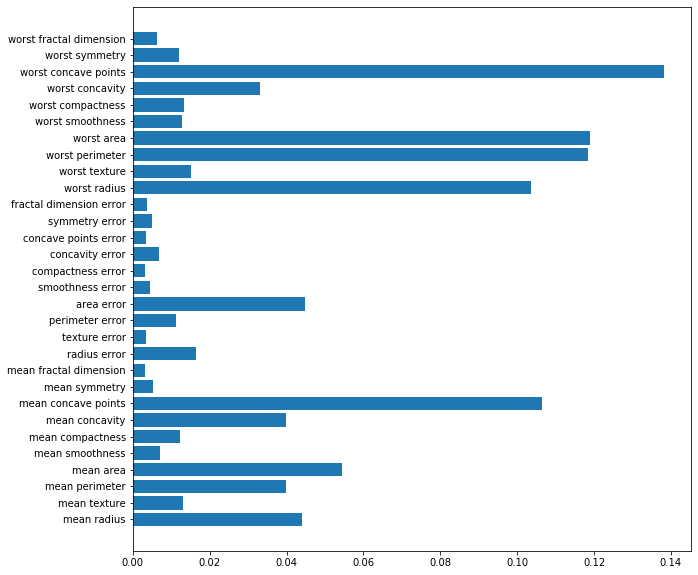

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
n_features = len(cancer_pd.columns[:30])
feat_index = np.arange(n_features)
plt.figure(figsize=(10,10))
plt.barh(feat_index, rf.feature_importances_)
plt.yticks(feat_index, cancer_pd.columns[:30])
plt.show()

In [19]:
feat_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [20]:
rf.feature_importances_

array([0.04399285, 0.01299842, 0.03976627, 0.05446227, 0.00714275,
       0.01239485, 0.039765  , 0.10654452, 0.00533484, 0.00315537,
       0.01644643, 0.00333954, 0.01130409, 0.04472735, 0.00457545,
       0.00325743, 0.00682628, 0.0035369 , 0.00509052, 0.00369439,
       0.10362723, 0.01501131, 0.11842856, 0.11882983, 0.01282311,
       0.01323184, 0.03321632, 0.13827988, 0.0119313 , 0.00626512])

In [18]:
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=7)
meta_clf = SVC(gamma='scale')
clf_stack = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=meta_clf, store_train_meta_features=True)
clf_stack.fit(X_train, y_train)
y_pred_stack = clf_stack.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

[[53  1]
 [ 8 81]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92        54
         1.0       0.99      0.91      0.95        89

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143

